# Linear algebra overview projection example

Linear algebra is the study of **vectors** and **linear transformations**. This notebook introduces concepts form linear algebra in a birds-eye overview. The goal is not to get into the details, but to give the reader a taste of the different types of thinking: computational, geometrical, and theoretical, that are used in linear algebra.

## Plan

  - 1. Prerequisites
  - 2. Vectors
    - Definition 
    - Geomterical interpretation
    - Dot product
  - Projections
    - Projection operation
    - Example: projection onto the line with equation $x-y=0$
  - Vector functions
    - Linear property: $f(a\mathbf{x} + b\mathbf{y}) = af(\mathbf{x}) + bf(\mathbf{y})$
    - Projection transformation P
  - Matrix representation of linear transformations
    - Linear transformation <--> Matrix-vector product equivalence
    - Show matrix representation M_P of Projection transformation P
  - Matrices
    - Definition 
    - Matrix operations
      - Matrix-vector product 
      - Matrix-matrix product
      - Trace
      - Determinant
      - Matrix inverse
      - Matrix equations
    - Reduced row echelon form

In [1]:
# setup SymPy
from sympy import *
x, y, z, t = symbols('x y z t')
init_printing()

# a vector is a special type of matrix (an n-vector is either a nx1 or a 1xn matrix)
Vector = Matrix   # define alias Vector so I don't have to explain this during video

# setup plotting
%matplotlib inline
import matplotlib.pyplot as mpl
from plot_helpers import plot_vec, plot_vecs, plot_line, plot_plane, autoscale_arrows

# Prerequisites

Linear algebra builds upon high school math concepts like:
  - Geometry (lines, curves, areas, triangles)
  - Numbers (integers, rationals, reals, complex numbers)
  - Functions ($f(x)$ takes an input $x$ and produces an output $y$)

# Vectors

In [2]:
# define two vectors
u = Vector([1,1])
v = Vector([1,-1])
u

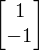

In [3]:
v

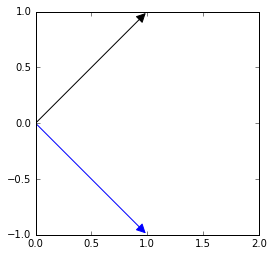

In [4]:
plot_vecs(u, v)
autoscale_arrows()

### Vector addition

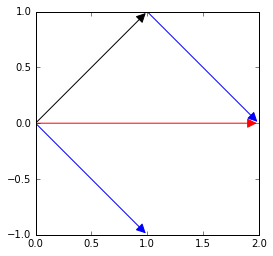

In [5]:
# graphical
plot_vecs(u,v)
plot_vec(v, at=u, color='b')
plot_vec(u+v, color='r')
autoscale_arrows()

# algebraic
u+v

### Vector length $\|\vec{u}\|$

In [6]:
u.norm()

### Unit-length vectors $\hat{u}$

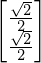

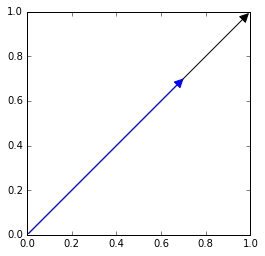

In [7]:
uhat = u/u.norm()

plot_vecs(u, uhat)

uhat

## Dot product

### Definition

The dot product of two vectors is proporional to the lengths for which the two vectors extend in the same direction.

If $\vec{u}=(u_1,u_2)$ and $\vec{v}=(v_1,v_2)$, then:

$$
  \vec{u} \cdot \vec{v} = u_1v_1 + u_2v_2 = \|\vec{u}\| \|\vec{v}\| \cos \theta_{uv},
$$

where $\theta_{uv}$ is the angle between the vectors.

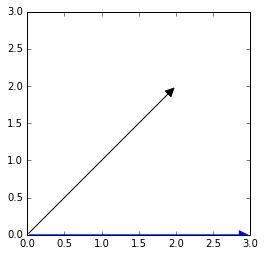

In [8]:
u = Vector([2,2])
v = Vector([3,0])

plot_vecs(u,v)
autoscale_arrows()

u.dot(v)

### Intuition

True

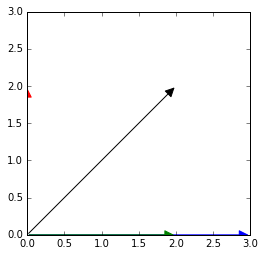

In [9]:
# split the vector u into two parts:
u_parallel_to_v = Vector([2,0])
u_perp_to_v = Vector([0,2])

plot_vecs(u, v, u_parallel_to_v, u_perp_to_v)
autoscale_arrows()

u == u_parallel_to_v + u_perp_to_v

In [10]:
# the dot product uses only the part of u that is parallel to v
u.dot(v) == u_parallel_to_v.dot(v) == u_parallel_to_v.norm()*v.norm()

True

In [11]:
# two vetors that are perpendicular, have zero dot product together
u_perp_to_v.dot(v)

# Projections

A projection of the vector $\vec{v}$ in the direction $\vec{d}$ is denoted $\Pi_{\vec{d}}(\vec{v})$. The formula for computing the projections uses the dot product operation:

$$
   \Pi_{\vec{d}}(\vec{v})  
      \ \equiv \ 
      (\vec{v} \cdot \hat{d}) \hat{d}
      \ =  \ 
      \left(\vec{v} \cdot \frac{\vec{d}}{\|\vec{d}\|} \right) \frac{\vec{d}}{\|\vec{d}\|}.
$$

## General projection operation

In [12]:
def proj(v, d):
    """Computes the projection of vector `v` onto direction `d`."""
    return v.dot( d/d.norm() )*( d/d.norm() )

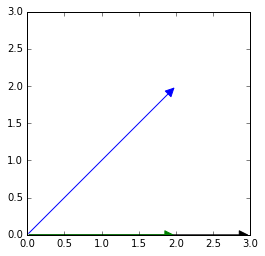

In [13]:
v = Vector([2,2])
d = Vector([3,0])
proj_v_on_d = proj(v,d)

plot_vecs(d, v, proj_v_on_d)
autoscale_arrows()

Projections play an important role in physics. For example, when solving a two dimensional projectile problem we often decompose vector quantities like forces $\vec{F}$, velocities $\vec{v}$, and momenta $\vec{p}$ into their $x$- and $y$-components: $(F_x,F_y)$, $(v_x,v_y)$, and $(p_x,p_y)$. This decomposition of vectors can transform a complicated two-dimensional problem into two simpler one-dimensaional problems, which can be solved independetly.

## Example: projection onto the line with equation $y=x$

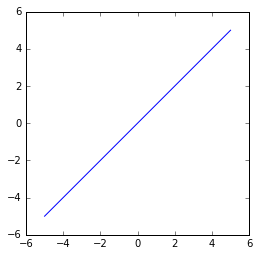

In [14]:
# The line with equation y = x can also be written as a paramteric equation 
# [x,y] = [0,0] + s*[1,1] where d = [1,1] is called the direction vector the line
d = Vector([1,1])

plot_line(d,[0,0])

## Take 1: using projection operation

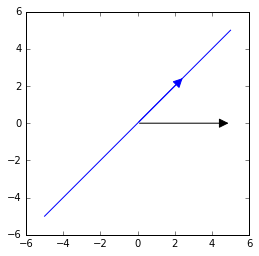

In [15]:
# want a function that computes the projection onto the line with equation y = x for any vec
def P(vec):
    """Compute the projection of vector `vec` onto line y=x."""
    return proj(vec, d)

v = Vector([5,0])

plot_line(d,[0,0])
plot_vecs(v, P(v))
P(v)

# Vector functions

Observe that the function `P` is a *vector function*—a function that takes vectors as inputs and produces vectors as outputs. In mathematical notation we write this as

$$
  P : \mathbb{R}^2 \to \mathbb{R}^2.
$$

## Linear property: 

A *linear transformation* $T$ is a vector function that obeys the linear property:

$$
 T(a\vec{x} + b\vec{y}) = aT(\vec{x}) + bT(\vec{y}).
$$

## Take 2: projection transformation P

The projection $P$ is a linear transformation, so it obeeys:

$$
 P\left( \begin{bmatrix}a \\ b \end{bmatrix} \right)
 = P(a\hat{\imath} + b\hat{\jmath}) 
 = aP(\hat{\imath}) + bP(\hat{\jmath}).
$$

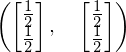

In [16]:
ihat = Vector([1,0])
jhat = Vector([0,1])

Pihat = P(ihat)
Pjhat = P(jhat)

Pihat, Pjhat

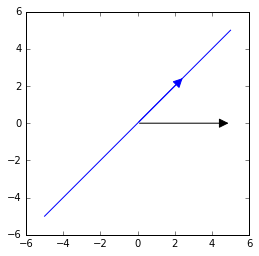

In [17]:
def P2(vec):
    """Compute the projection of vector `vec` onto line y=x."""
    return vec[0]*Pihat + vec[1]*Pjhat

v = Vector([5,0])

plot_line(d,[0,0])
plot_vecs(v, P2(v))

## Take 3: linear transformation as matrix-vector product

## Matrix definition

$$
  \alpha \vec{u} + \beta \vec{v}
  =
  \alpha 
  \begin{bmatrix}u_1 \\ u_2 \end{bmatrix}
  +
  \beta
  \begin{bmatrix}v_1 \\ v_2 \end{bmatrix}
  =
  \begin{bmatrix}u_1 & v_1 \\ u_2 & v_2 \end{bmatrix}
  \!
  \begin{bmatrix} \alpha \\ \beta \end{bmatrix}.
$$

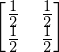

In [18]:
M_P = Matrix([[1,1],
              [1,1]])/2

M_P

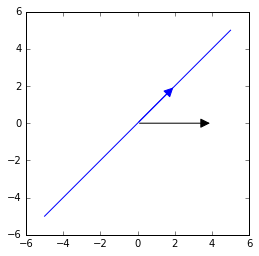

In [19]:
def P3(vec):
    """Compute the projection of vector `vec` onto the line y=x."""
    return M_P*vec

v = Vector([4,0])

plot_line(d, [0,0])
plot_vecs(v, P3(v))

In [20]:
M_P.shape

Equivalence relationship between linear transformstions $T$ and matrices $M_T$:
    
$$
  T : \mathbb{R}^n \to \mathbb{R}^m
  \qquad
  \Leftrightarrow
  \qquad
  M_T \in \mathbb{R}^{m \times n}
$$

# Matrices

A matrix is a two-dimensional array of numbers.

### Example

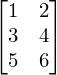

In [21]:
A = Matrix([[1,2],
            [3,4],
            [5,6]])
A

In [22]:
A.shape

## Matrix operations

  - Addition (denoted $A+B$)
  - Subtraction, the inverse of addition (denoted $A-B$)
  - Scaling by a constant $\alpha$  (denoted $\alpha A$)
  - Matrix-vector product (denoted $A\vec{x}$) 
  - Matrix product (denoted $AB$) 
  - Matrix inverse (denoted $A^{-1}$)
  - Trace (denoted $\textrm{Tr}(A)$)
  - Determinant (denoted $\textrm{det}(A)$ or $|A|$)

### Matrix-vector product

$$
  A \vec{x}
  \quad
  \Leftrightarrow
  \quad
    \begin{bmatrix}
    a_{11} & a_{12} \\
    a_{21} & a_{22} \\
    a_{31} & a_{32} 
    \end{bmatrix}
    \!\!
    \begin{bmatrix}
    x_1 \\
    x_2 
    \end{bmatrix}
 \equiv 
    \begin{bmatrix}
    x_1a_{11} + x_2a_{12} \\
    x_1a_{21} + x_2a_{22} \\
    x_1a_{31} + x_2a_{32} 
    \end{bmatrix}
$$

The matrix-vector product is defined this way so it can represent linear transformations.

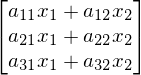

In [23]:
a_11, a_12, a_21, a_22, a_31, a_32 = symbols('a_11 a_12 a_21 a_22 a_31 a_32')
x_1, x_2 = symbols('x_1 x_2')

A = Matrix([
        [a_11, a_12],
        [a_21, a_22], 
        [a_31, a_32]])
x = Vector([x_1,x_2])

A*x

### Matrix-matrix product

$$
  AB
  \quad \Leftrightarrow  \quad
\begin{bmatrix}
 a_{11} 		&  a_{12}	 \\[1.5mm]
 a_{21} 		&  a_{22}	 \\[1.5mm]
 a_{31} 		&  a_{32}	 
\end{bmatrix}
\!\!
\begin{bmatrix}
 b_{11} 		&  b_{12}	 \\[1.5mm]
 b_{21} 		&  b_{22}	 \\
\end{bmatrix}
=
\begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} 	&  a_{11}b_{12} + a_{12}b_{22} 	 \\[1.5mm]
a_{21}b_{11} + a_{22}b_{21} 	&  a_{21}b_{12} + a_{22}b_{22} 	 \\[1.5mm]
a_{31}b_{11} + a_{32}b_{21} 	&  a_{31}b_{12} + a_{32}b_{22} 	 
\end{bmatrix}
$$

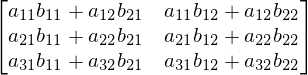

In [24]:
b_11, b_12, b_21, b_22 = symbols('b_11 b_12 b_21 b_22')
B = Matrix([[b_11, b_12],
            [b_21, b_22]])

A*B

In [25]:
#  (AB)_ij = dot product of ith row of A with jth col of B
(A*B)[2,1] == A[2,:].dot( B[:,1])

True

The matrix-matrix product implements **composition of linear transformations**:

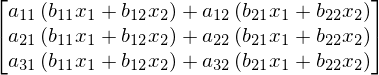

In [26]:
A*(B*x)

In [27]:
expand( A*(B*x) ) == expand( (A*B)*x )

True

In [28]:
# analogy with ordinary functions...
x = symbols('x')
def f(x):
    return 2*x

def g(x):
    return  3*x

f(g(x))

In [29]:
def h(x):
    return 6*x

h(x)

### Matrix inverse

For an invertible matrix $A$, the matrix inverse $A^{-1}$ acts to undo the effects of $A$:

$$
 A^{-1} A \vec{v} = \vec{v}.
$$

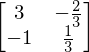

In [30]:
A = Matrix([[1,2],
            [3,9]])

A.inv()

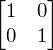

In [31]:
A.inv()*A

### Matrix equations

Suppose we're given the equation
$$
 A\vec{x} = \vec{b}
$$
and we want to solve for $\vec{x}$.

One way to find $\vec{x}$ is to multiply both sides of the equation by $A^{-1}$:
$$
 A^{-1}A\vec{x} = A^{-1}\vec{b}
$$
since $A^{-1}$ cancels $A$ we obtain:
$$
 \vec{x} = A^{-1}\vec{b}.
$$

#### Example

$$
    \begin{bmatrix}
    1 & 2 \\
    3 & 9
    \end{bmatrix}
    \!\!
    \begin{bmatrix}
    x_1 \\
    x_2 
    \end{bmatrix}
    =
    \begin{bmatrix}
    5 \\
    21 
    \end{bmatrix}    
\qquad
\Rightarrow
\qquad
    \begin{bmatrix}
    x_1 \\
    x_2 
    \end{bmatrix}
    =
    \begin{bmatrix}
    1 & 2 \\
    3 & 9
    \end{bmatrix}^{-1}
    \!\!
    \begin{bmatrix}
    5 \\
    21 
    \end{bmatrix}    
$$


In [32]:
A = Matrix([[1,2],
            [3,9]])

b = Vector([5,21]) 

x = A.inv()*b
x

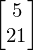

In [33]:
# verify A*x == b
A*x 

## Gauss-Jordan elimination procedure for matrices

Used to transform any matrix into *reduced row echelon form* (RREF) by performing row operations. 
This procedure has applications to solving equations, finding matrix inverses, and solving certain vector space problems.

# Linear transformations

We can understand the properties of linear transformations $T$, and their matrix representations $M_T$ in analogy with ordinary functions:

\begin{align*}
    \textrm{function } 
     f:\mathbb{R}\to \mathbb{R}
         & \ \Leftrightarrow \,
         \begin{array}{l}
    \textrm{linear transformation } 
    T:\mathbb{R}^{n}\! \to \mathbb{R}^{m}		 \\
    \textrm{represented by the matrix } M_T \in \mathbb{R}^{m \times n}
    \end{array} \\
    %
    \textrm{input }  x\in \mathbb{R} 	
         & \ \Leftrightarrow \  
        \textrm{input }  \vec{x} \in \mathbb{R}^n           \\
    %\textrm{compute } 
    \textrm{output } f(x) \in \mathbb{R}
         & \ \Leftrightarrow \
    %      \textrm{compute matrix-vector product } 
     \textrm{output }      T(\vec{x}) \equiv M_T\vec{x} \in \mathbb{R}^m \\
    %\textrm{function composition  } 
    g\circ\! f \: (x) =  g(f(x))
         & \ \Leftrightarrow \
    %      \textrm{matrix product } 
    S(T(\vec{x})) \equiv M_SM_T \vec{x} \\
    \textrm{function inverse } f^{-1}
         & \ \Leftrightarrow \ 
          \textrm{matrix inverse } M_T^{-1} \\
    \textrm{zeros of } f
         & \ \Leftrightarrow \
          \textrm{kernel of } T  \equiv  \textrm{null space of } M_T \equiv \mathcal{N}(A)  \\
    \textrm{image of } f
         & \ \Leftrightarrow \ 
             \begin{array}{l}
             \textrm{image of } T \equiv  \textrm{column space of } M_T  \equiv \mathcal{C}(A) 
              \end{array}
\end{align*}

Observe we refer to the linear transformation $T$ and its matrix representation $M_T$ interchangeably.